#Исследование анкет студентов

Целью исследования является нахождение факторов, влияющих на успеваемость студентов.

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, pearsonr, chi2_contingency, f_oneway
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')
# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ЯПАД/Project/students.csv')

Информация о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

Основные статистики

In [5]:
display(df.describe())

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Height of 5000 mm,Width of 5000 mm,Putin age,Hair length,Floor number,Social network duration min,City population,MIddle and index finger,Middle and ring finger,Middle and little finger
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02,186.000000,186.000000,186.000000
mean,20.688172,170.661290,39.715054,3.500000,1991.107527,374.032258,81.634409,58.177419,13.182796,32.801075,...,75.720430,177.688172,690.236559,34.365054,6.322581,5.417500e+08,7.946669e+05,9.741935,9.705376,28.798925
std,3.468713,9.055881,2.814920,3.147285,132.099550,2199.541507,14.325019,29.575478,26.414552,38.992282,...,107.747088,240.978320,7360.321689,25.672211,4.338791,7.332267e+09,6.093052e+05,4.385241,6.894963,19.710011
min,17.000000,153.000000,34.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,42.000000,0.200000,1.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,19.000000,164.000000,38.000000,2.000000,2000.000000,74.500000,76.000000,50.000000,0.000000,0.000000,...,50.000000,100.000000,67.000000,12.000000,3.000000,1.200000e+02,7.000000e+05,7.000000,6.000000,20.000000
50%,20.000000,169.000000,39.000000,3.000000,2001.500000,130.000000,85.000000,70.000000,0.000000,0.000000,...,60.000000,140.000000,69.000000,30.000000,5.000000,2.000000e+02,8.000000e+05,10.000000,10.000000,28.500000
75%,21.000000,178.000000,42.000000,4.000000,2003.000000,236.000000,91.000000,76.750000,0.000000,75.000000,...,70.000000,167.250000,70.000000,50.000000,8.000000,3.600000e+02,8.845000e+05,12.000000,12.000000,35.000000
max,55.000000,197.000000,48.000000,37.000000,2004.000000,30000.000000,100.000000,100.000000,97.000000,98.000000,...,950.000000,1800.000000,100000.000000,150.000000,20.000000,1.000000e+11,8.000000e+06,30.000000,80.000000,250.000000


Проанализируем пропущенные значения

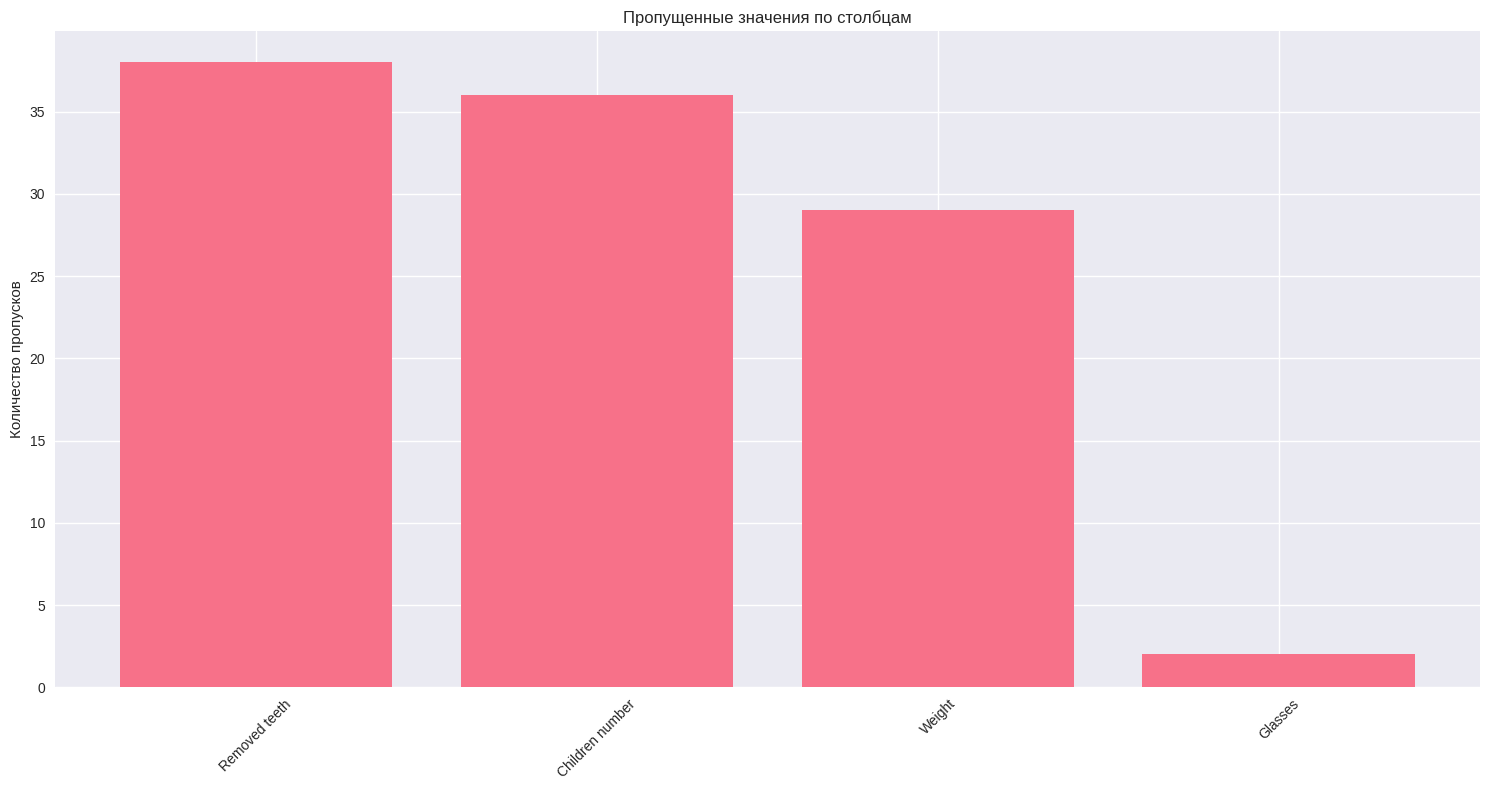

In [6]:
plt.figure(figsize=(15, 8))
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
plt.bar(missing_data.index, missing_data.values)
plt.title('Пропущенные значения по столбцам')
plt.xticks(rotation=45)
plt.ylabel('Количество пропусков')
plt.tight_layout()
plt.show()

In [7]:
print(f"Всего пропущенных значений: {df.isnull().sum().sum()}")

Всего пропущенных значений: 105


## Предобработка данных

In [8]:
rating_columns = ['Russian rating', 'Maths rating', 'Physics rating', 'Computer science rating',
                 'Chemistry rating', 'Literature rating', 'History rating', 'Geography rating',
                 'Biology rating', 'Foreign language rating', 'Social science rating']

print(f"Количество предметов для расчета успеваемости: {len(rating_columns)}")

# Заменяем нули на NaN и вычисляем средний балл
df_ratings = df[rating_columns].replace(0, np.nan)
df['Average_rating'] = df_ratings.mean(axis=1, skipna=True)
df['Subjects_count'] = df_ratings.notna().sum(axis=1)

# Создание категорий успеваемости
df['Rating_category'] = pd.cut(df['Average_rating'],
                              bins=[0, 60, 75, 90, 101],
                              labels=['Низкая', 'Средняя', 'Высокая', 'Отличная'])

print(f"Средняя успеваемость по датасету: {df['Average_rating'].mean():.2f} ± {df['Average_rating'].std():.2f}")
print(f"Минимальная успеваемость: {df['Average_rating'].min():.2f}")
print(f"Максимальная успеваемость: {df['Average_rating'].max():.2f}")

# Преобразование категориальных переменных
binary_mappings = {
    'Glasses_binary': {'да': 1, 'нет': 0, 'простите. не увидел(а) вопроса )))': np.nan},
    'Sex_binary': {'мужской': 1, 'женский': 0},
    'Problems_binary': {'да': 1, 'нет': 0},
    'Army_binary': {'могут призвать': 1, 'не призовут (по разным причинам)': 0},
    'Hostel_binary': {'да': 1, 'нет': 0},
    'Coin_binary': {'Орел': 1, 'Решка': 0}
}

for new_col, mapping in binary_mappings.items():
    if 'Sex' in new_col:
        df[new_col] = df['Sex'].map(mapping)
    elif 'Problems' in new_col:
        df[new_col] = df['Problems in last semester'].map(mapping)
    elif 'Army' in new_col:
        df[new_col] = df['Army'].map(mapping)
    elif 'Hostel' in new_col:
        df[new_col] = df['Hostel'].map(mapping)
    elif 'Coin' in new_col:
        df[new_col] = df['Coin'].map(mapping)
    else:
        df[new_col] = df['Glasses'].map(mapping)

# Кодирование предпочтений животных
df['Animal_cats'] = df['Animal'].apply(lambda x: 1 if 'Кошек' in str(x) else 0)
df['Animal_dogs'] = df['Animal'].apply(lambda x: 1 if 'Собак' in str(x) else 0)
df['Animal_hate'] = df['Animal'].apply(lambda x: 1 if 'Ненавижу' in str(x) else 0)

# Создание возрастных групп с расширенными границами
df['Age_group'] = pd.cut(df['Age'],
                        bins=[17, 19, 21, 23, 25, 30, 60],
                        labels=['17-19', '20-21', '22-23', '24-25', '26-30', '30+'])

# Создание группы по курсу
df['Course_group'] = pd.cut(df['Course number'],
                           bins=[-1, 1, 3, 5, 10],
                           labels=['1-2 курс', '3-4 курс', '5-6 курс', 'Магистратура/Аспирантура'])

Количество предметов для расчета успеваемости: 11
Средняя успеваемость по датасету: 74.32 ± 11.05
Минимальная успеваемость: 5.33
Максимальная успеваемость: 93.75


##**Демографический анализ**




1. Распределение по полу студентов


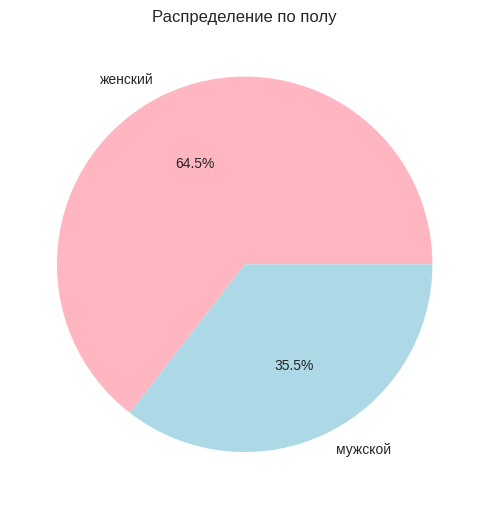

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Распределение по полу')
plt.tight_layout()
plt.show()

2. Распределение возраста студентов

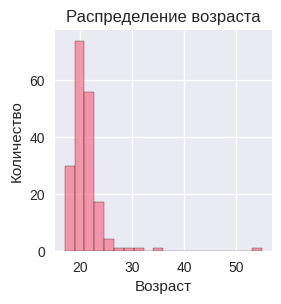

In [10]:
plt.subplot(2, 3, 2)
plt.hist(df['Age'].dropna(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

3. Распределение роста студентов

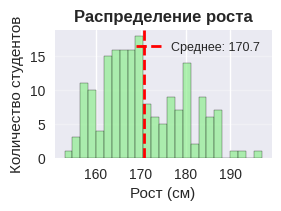

In [11]:
ax3 = plt.subplot(3, 3, 3)
growth_data = df['Growth'].dropna()
ax3.hist(growth_data, bins=25, alpha=0.7, edgecolor='black', color='lightgreen')
ax3.set_title('Распределение роста', fontsize=12, fontweight='bold')
ax3.set_xlabel('Рост (см)')
ax3.set_ylabel('Количество студентов')
ax3.grid(axis='y', alpha=0.3)
ax3.axvline(growth_data.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {growth_data.mean():.1f}')
ax3.legend(fontsize=9)
plt.tight_layout()
plt.show()

4. Распределение по институтам

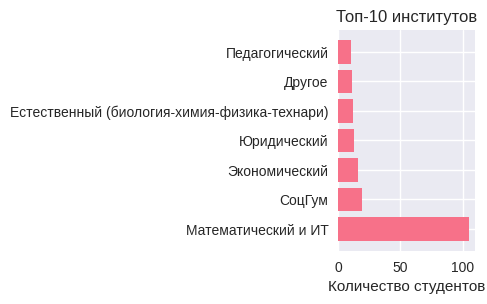

In [12]:
plt.subplot(2, 3, 4)
institute_counts = df['Your insitute'].value_counts().head(10)
plt.barh(institute_counts.index, institute_counts.values)
plt.title('Топ-10 институтов')
plt.xlabel('Количество студентов')
plt.tight_layout()
plt.show()

5. Семейное положение

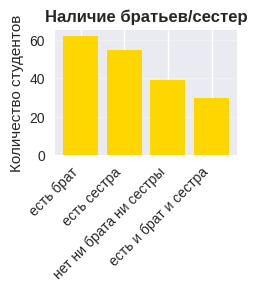

In [13]:
ax5 = plt.subplot(3, 3, 5)
siblings_counts = df['Brother-sister'].value_counts()
bars = ax5.bar(range(len(siblings_counts)), siblings_counts.values, color='gold')
ax5.set_xticks(range(len(siblings_counts)))
ax5.set_xticklabels(siblings_counts.index, rotation=45, ha='right')
ax5.set_title('Наличие братьев/сестер', fontsize=12, fontweight='bold')
ax5.set_ylabel('Количество студентов')
ax5.grid(axis='y', alpha=0.3)

6. Распределение по возрастным группам

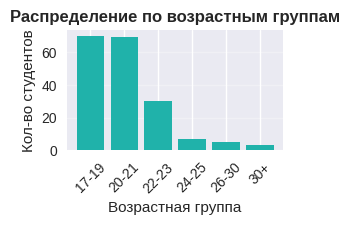

In [14]:
ax6 = plt.subplot(3, 3, 6)
age_group_counts = df['Age_group'].value_counts().sort_index()
bars = ax6.bar(age_group_counts.index, age_group_counts.values, color='lightseagreen')
ax6.set_title('Распределение по возрастным группам', fontsize=12, fontweight='bold')
ax6.set_xlabel('Возрастная группа')
ax6.set_ylabel('Кол-во студентов')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

7. Проживание в общежитии

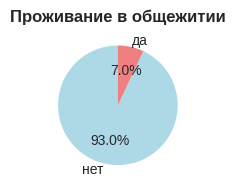

In [15]:
ax7 = plt.subplot(3, 3, 7)
hostel_counts = df['Hostel'].value_counts()
ax7.pie(hostel_counts.values, labels=hostel_counts.index, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax7.set_title('Проживание в общежитии', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

8. Пригодность к армии

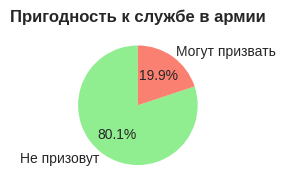

In [16]:
ax8 = plt.subplot(3, 3, 8)
army_counts = df['Army'].value_counts()
ax8.pie(army_counts.values, labels=['Не призовут', 'Могут призвать'],
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
ax8.set_title('Пригодность к службе в армии', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

9. Ношение очков

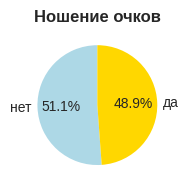

In [17]:
ax9 = plt.subplot(3, 3, 9)
glasses_counts = df['Glasses'].value_counts()
glasses_counts = glasses_counts[~glasses_counts.index.str.contains('простите')]
ax9.pie(glasses_counts.values, labels=glasses_counts.index, autopct='%1.1f%%',
        colors=['lightblue', 'gold'], startangle=90)
ax9.set_title('Ношение очков', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

##**Академический анализ**

1. Распределение успеваемости

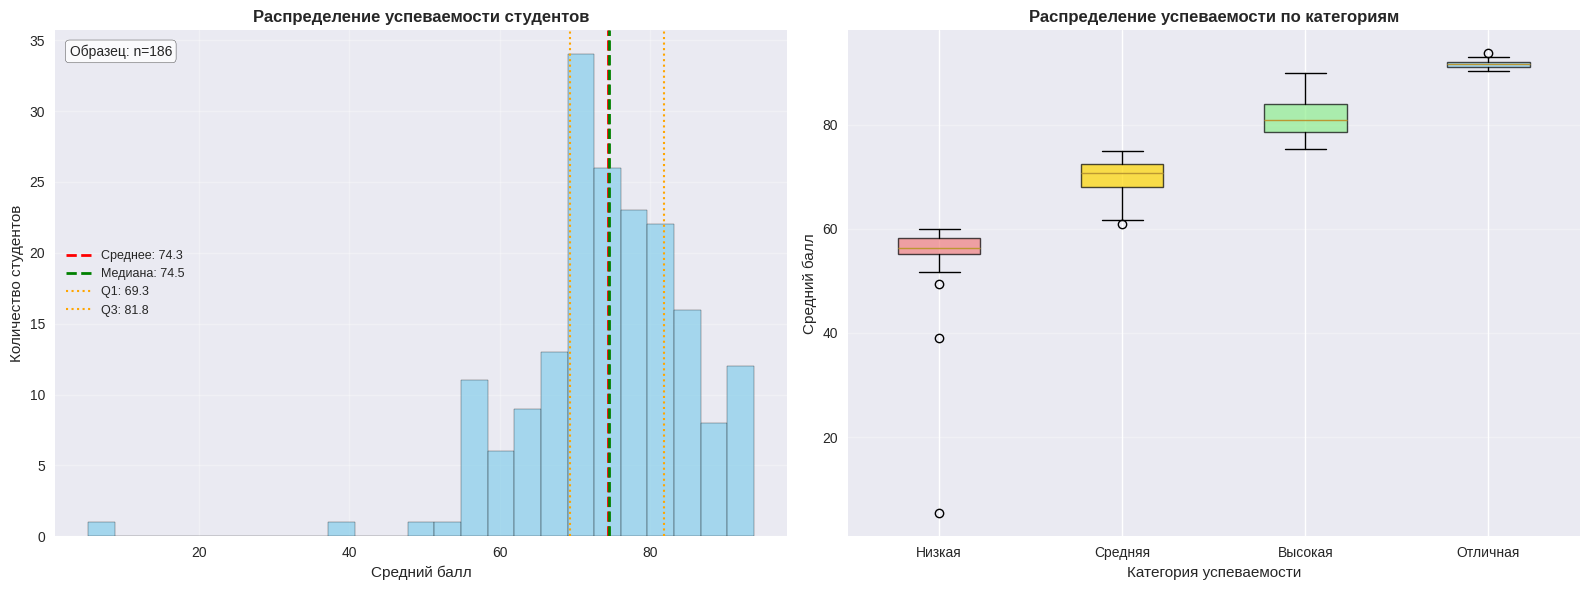

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма распределения успеваемости
ax1 = axes[0]
n, bins, patches = ax1.hist(df['Average_rating'].dropna(), bins=25, alpha=0.7,
                           color='skyblue', edgecolor='black', density=False)
ax1.set_xlabel('Средний балл', fontsize=11)
ax1.set_ylabel('Количество студентов', fontsize=11)
ax1.set_title('Распределение успеваемости студентов', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Добавляем линии среднего, медианы и квартили
mean_rating = df['Average_rating'].mean()
median_rating = df['Average_rating'].median()
q1_rating = df['Average_rating'].quantile(0.25)
q3_rating = df['Average_rating'].quantile(0.75)

ax1.axvline(mean_rating, color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {mean_rating:.1f}')
ax1.axvline(median_rating, color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {median_rating:.1f}')
ax1.axvline(q1_rating, color='orange', linestyle=':', linewidth=1.5,
           label=f'Q1: {q1_rating:.1f}')
ax1.axvline(q3_rating, color='orange', linestyle=':', linewidth=1.5,
           label=f'Q3: {q3_rating:.1f}')
ax1.legend(fontsize=9)

# Добавляем аннотации
ax1.text(0.02, 0.95, f'Образец: n={len(df)}', transform=ax1.transAxes,
        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Boxplot по категориям успеваемости
ax2 = axes[1]
rating_by_category = []
categories = ['Низкая', 'Средняя', 'Высокая', 'Отличная']
for category in categories:
    rating_by_category.append(df[df['Rating_category'] == category]['Average_rating'].dropna())

bp = ax2.boxplot(rating_by_category, labels=categories, patch_artist=True)
# Цвета для boxplot
colors = ['lightcoral', 'gold', 'lightgreen', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_xlabel('Категория успеваемости', fontsize=11)
ax2.set_ylabel('Средний балл', fontsize=11)
ax2.set_title('Распределение успеваемости по категориям', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print("Статистика успеваемости")
print("=" * 50)
print(f"{'Метрика':<25} {'Значение':>15}")
print("-" * 50)
print(f"{'Средний балл':<25} {mean_rating:>15.2f}")
print(f"{'Стандартное отклонение':<25} {df['Average_rating'].std():>15.2f}")
print(f"{'Медиана':<25} {median_rating:>15.2f}")
print(f"{'Минимальный балл':<25} {df['Average_rating'].min():>15.2f}")
print(f"{'Максимальный балл':<25} {df['Average_rating'].max():>15.2f}")
print(f"{'Q1 (25-й перцентиль)':<25} {q1_rating:>15.2f}")
print(f"{'Q3 (75-й перцентиль)':<25} {q3_rating:>15.2f}")
print(f"{'Межквартильный размах':<25} {(q3_rating - q1_rating):>15.2f}")
print(f"{'Коэффициент вариации':<25} {(df['Average_rating'].std()/mean_rating*100):>15.1f}%")
print("-" * 50)

Статистика успеваемости
Метрика                          Значение
--------------------------------------------------
Средний балл                        74.32
Стандартное отклонение              11.05
Медиана                             74.50
Минимальный балл                     5.33
Максимальный балл                   93.75
Q1 (25-й перцентиль)                69.31
Q3 (75-й перцентиль)                81.75
Межквартильный размах               12.44
Коэффициент вариации                 14.9%
--------------------------------------------------


2. Анализ успеваемости по предметам

Создадим список предметов

In [20]:
subjects = ['Russian rating', 'Maths rating', 'Physics rating', 'Computer science rating',
           'Chemistry rating', 'Literature rating', 'History rating', 'Geography rating',
           'Biology rating', 'Foreign language rating', 'Social science rating']

Средние оценки по предметам

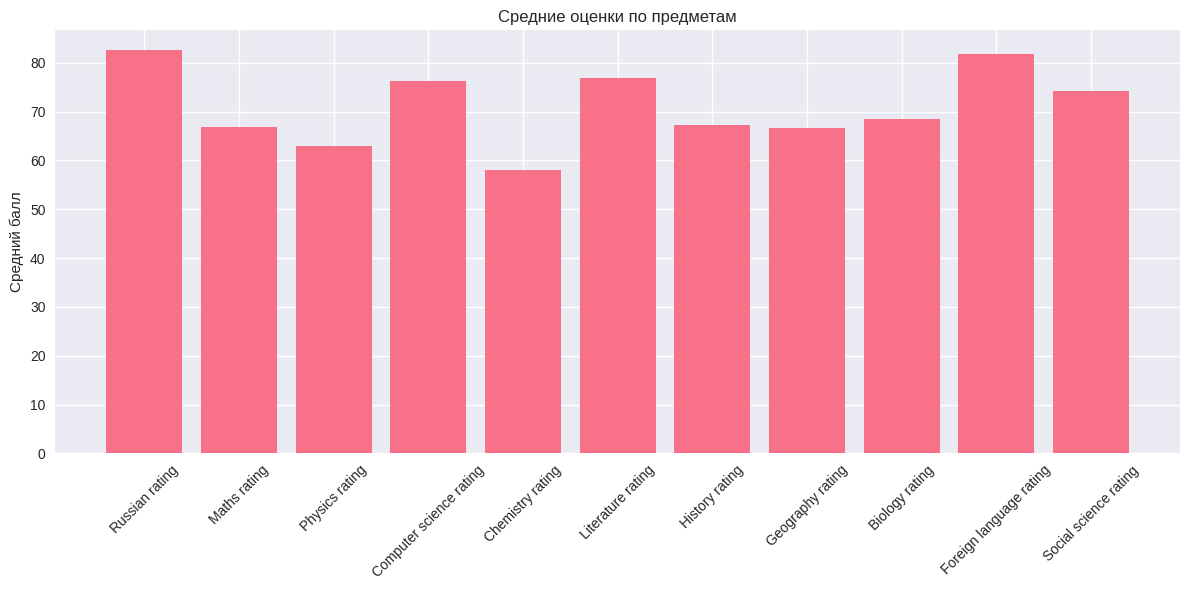

In [21]:
subject_means = {}
for subject in subjects:
    if subject in df.columns:
        mean_val = df[subject].replace(0, np.nan).mean()
        subject_means[subject] = mean_val

plt.figure(figsize=(12, 6))
plt.bar(subject_means.keys(), subject_means.values())
plt.title('Средние оценки по предметам')
plt.xticks(rotation=45)
plt.ylabel('Средний балл')
plt.tight_layout()
plt.show()

Корреляция между оценками

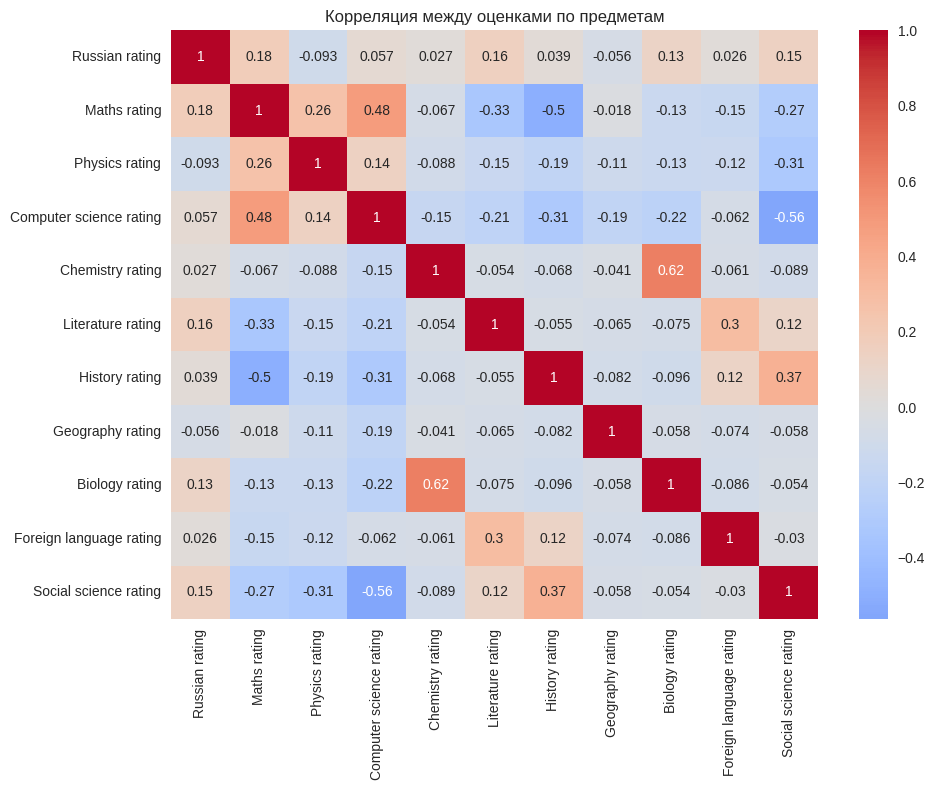

In [22]:
subject_corr = df[subjects].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(subject_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между оценками по предметам')
plt.tight_layout()
plt.show()

Из матрицы корреляции оценок видно четкое разделение на два основных кластера:

*   Естественнонаучный блок (математика, физика, информатика);
*   Гуманитарный кластер (литература, история, обществознание).

При этом между этими двумя группами наблюдается слабая связь, что указывает на специализацию студентов - те, кто силен в технических дисциплинах, часто показывают средние результаты в гуманитарных, и наоборот. Русский язык обычно занимает промежуточное положение, коррелируя с обеими группами. Химия и биология могут образовывать отдельный естественнонаучный кластер.

In [23]:
strong_correlations = subject_corr[(subject_corr > 0.6) & (subject_corr < 1.0)].stack()
weak_correlations = subject_corr[(subject_corr < 0.3) & (subject_corr > -0.3)].stack()

print("Самые сильные связи между предметами:")
print(strong_correlations.sort_values(ascending=False).head(10))

print("\nСамые слабые связи между предметами:")
print(weak_correlations.sort_values(ascending=True).head(10))

Самые сильные связи между предметами:
Chemistry rating  Biology rating      0.61765
Biology rating    Chemistry rating    0.61765
dtype: float64

Самые слабые связи между предметами:
Maths rating             Social science rating     -0.270595
Social science rating    Maths rating              -0.270595
Biology rating           Computer science rating   -0.218356
Computer science rating  Biology rating            -0.218356
                         Literature rating         -0.205596
Literature rating        Computer science rating   -0.205596
Geography rating         Computer science rating   -0.187502
Computer science rating  Geography rating          -0.187502
Physics rating           History rating            -0.185174
History rating           Physics rating            -0.185174
dtype: float64


## Основные зависимости с успеваемостью

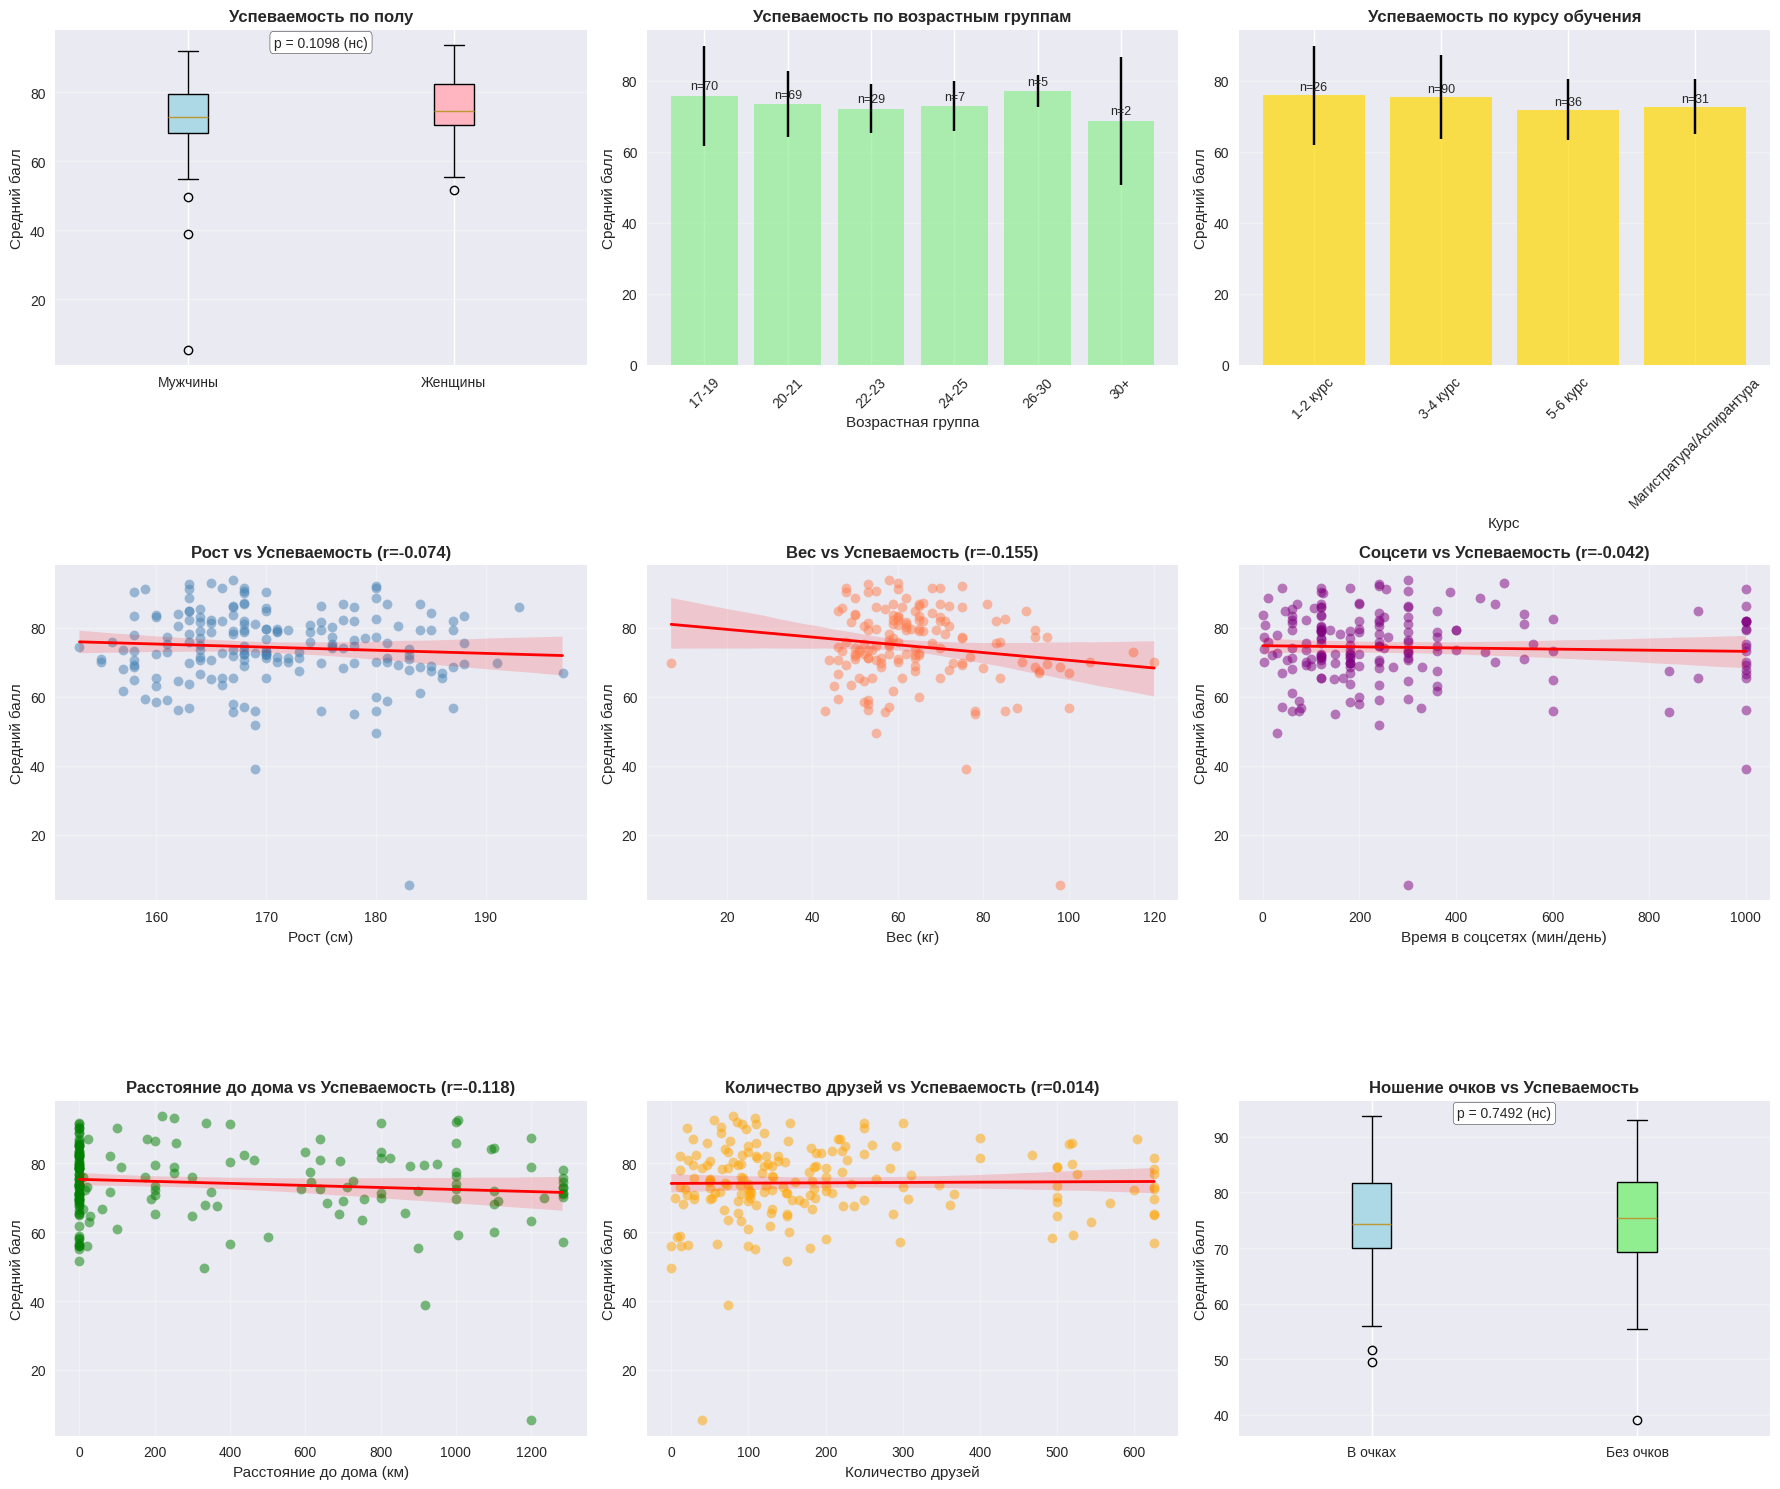

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Успеваемость по полу
ax1 = axes[0, 0]
gender_groups = df.groupby('Sex')['Average_rating']
male_rating = gender_groups.get_group('мужской') if 'мужской' in gender_groups.groups else pd.Series()
female_rating = gender_groups.get_group('женский') if 'женский' in gender_groups.groups else pd.Series()

if not male_rating.empty and not female_rating.empty:
    positions = [0, 1]
    box_data = [male_rating.dropna(), female_rating.dropna()]
    bp = ax1.boxplot(box_data, labels=['Мужчины', 'Женщины'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightpink')

    # t-тест для статистической значимости
    t_stat, p_value = ttest_ind(male_rating.dropna(), female_rating.dropna(), equal_var=False)
    sig_stars = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'нс'

    ax1.text(0.5, 0.95, f'p = {p_value:.4f} ({sig_stars})',
            transform=ax1.transAxes, ha='center', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

    ax1.set_title('Успеваемость по полу', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Средний балл')
    ax1.grid(axis='y', alpha=0.3)

# 2. Успеваемость по возрастным группам
ax2 = axes[0, 1]
age_rating = df.groupby('Age_group')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
bars = ax2.bar(age_rating.index, age_rating['mean'],
               yerr=age_rating['std'], capsize=5, color='lightgreen', alpha=0.7)
ax2.set_title('Успеваемость по возрастным группам', fontsize=12, fontweight='bold')
ax2.set_xlabel('Возрастная группа')
ax2.set_ylabel('Средний балл')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Добавляем количество наблюдений
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = age_rating.iloc[i]['count']
    ax2.text(bar.get_x() + bar.get_width()/2, height + age_rating['std'].max()*0.1,
            f'n={int(count)}', ha='center', fontsize=9)


# 3. Успеваемость по курсу
ax3 = axes[0, 2]
course_rating = df.groupby('Course_group')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
bars = ax3.bar(course_rating.index, course_rating['mean'],
               yerr=course_rating['std'], capsize=5, color='gold', alpha=0.7)
ax3.set_title('Успеваемость по курсу обучения', fontsize=12, fontweight='bold')
ax3.set_xlabel('Курс')
ax3.set_ylabel('Средний балл')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    count = course_rating.iloc[i]['count']
    ax3.text(bar.get_x() + bar.get_width()/2, height + course_rating['std'].max()*0.1,
            f'n={int(count)}', ha='center', fontsize=9)

# 4. Рост и успеваемость
ax4 = axes[1, 0]
sns.regplot(data=df, x='Growth', y='Average_rating', ax=ax4,
           scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'steelblue'},
           line_kws={'color': 'red', 'linewidth': 2})
corr_growth = df['Growth'].corr(df['Average_rating'])
ax4.set_title(f'Рост vs Успеваемость (r={corr_growth:.3f})', fontsize=12, fontweight='bold')
ax4.set_xlabel('Рост (см)')
ax4.set_ylabel('Средний балл')
ax4.grid(alpha=0.3)

# 5. Вес и успеваемость
ax5 = axes[1, 1]
sns.regplot(data=df, x='Weight', y='Average_rating', ax=ax5,
           scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'coral'},
           line_kws={'color': 'red', 'linewidth': 2})
corr_weight = df['Weight'].corr(df['Average_rating'])
ax5.set_title(f'Вес vs Успеваемость (r={corr_weight:.3f})', fontsize=12, fontweight='bold')
ax5.set_xlabel('Вес (кг)')
ax5.set_ylabel('Средний балл')
ax5.grid(alpha=0.3)

# 6. Время в соцсетях и успеваемость
ax6 = axes[1, 2]
Q95_social = df['Social network duration min'].quantile(0.95)
social_clean = df['Social network duration min'].clip(upper=Q95_social)
sns.regplot(data=df, x=social_clean, y='Average_rating', ax=ax6,
           scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'purple'},
           line_kws={'color': 'red', 'linewidth': 2})
corr_social = social_clean.corr(df['Average_rating'])
ax6.set_title(f'Соцсети vs Успеваемость (r={corr_social:.3f})', fontsize=12, fontweight='bold')
ax6.set_xlabel('Время в соцсетях (мин/день)')
ax6.set_ylabel('Средний балл')
ax6.grid(alpha=0.3)


# 7. Расстояние до дома и успеваемость
ax7 = axes[2, 0]
Q95_distance = df['Distance to home km'].quantile(0.95)
distance_clean = df['Distance to home km'].clip(upper=Q95_distance)
sns.regplot(data=df, x=distance_clean, y='Average_rating', ax=ax7,
           scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'green'},
           line_kws={'color': 'red', 'linewidth': 2})
corr_distance = distance_clean.corr(df['Average_rating'])
ax7.set_title(f'Расстояние до дома vs Успеваемость (r={corr_distance:.3f})', fontsize=12, fontweight='bold')
ax7.set_xlabel('Расстояние до дома (км)')
ax7.set_ylabel('Средний балл')
ax7.grid(alpha=0.3)

# 8. Количество друзей и успеваемость
ax8 = axes[2, 1]
Q95_friends = df['Friend number'].quantile(0.95)
friends_clean = df['Friend number'].clip(upper=Q95_friends)
sns.regplot(data=df, x=friends_clean, y='Average_rating', ax=ax8,
           scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'orange'},
           line_kws={'color': 'red', 'linewidth': 2})
corr_friends = friends_clean.corr(df['Average_rating'])
ax8.set_title(f'Количество друзей vs Успеваемость (r={corr_friends:.3f})', fontsize=12, fontweight='bold')
ax8.set_xlabel('Количество друзей')
ax8.set_ylabel('Средний балл')
ax8.grid(alpha=0.3)

# 9. Ношение очков и успеваемость
ax9 = axes[2, 2]
glasses_clean = df[~df['Glasses'].str.contains('простите', na=False)]
glasses_rating = glasses_clean.groupby('Glasses')['Average_rating']
if len(glasses_rating.groups) >= 2:
    glasses_data = [glasses_rating.get_group('да').dropna(), glasses_rating.get_group('нет').dropna()]
    bp = ax9.boxplot(glasses_data, labels=['В очках', 'Без очков'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightgreen')

    # t-тест
    t_stat_glasses, p_value_glasses = ttest_ind(glasses_data[0], glasses_data[1], equal_var=False)
    sig_stars_glasses = '***' if p_value_glasses < 0.001 else '**' if p_value_glasses < 0.01 else '*' if p_value_glasses < 0.05 else 'нс'

    ax9.text(0.5, 0.95, f'p = {p_value_glasses:.4f} ({sig_stars_glasses})',
            transform=ax9.transAxes, ha='center', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

    ax9.set_title('Ношение очков vs Успеваемость', fontsize=12, fontweight='bold')
    ax9.set_ylabel('Средний балл')
    ax9.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Неочевидные и необычные зависимости

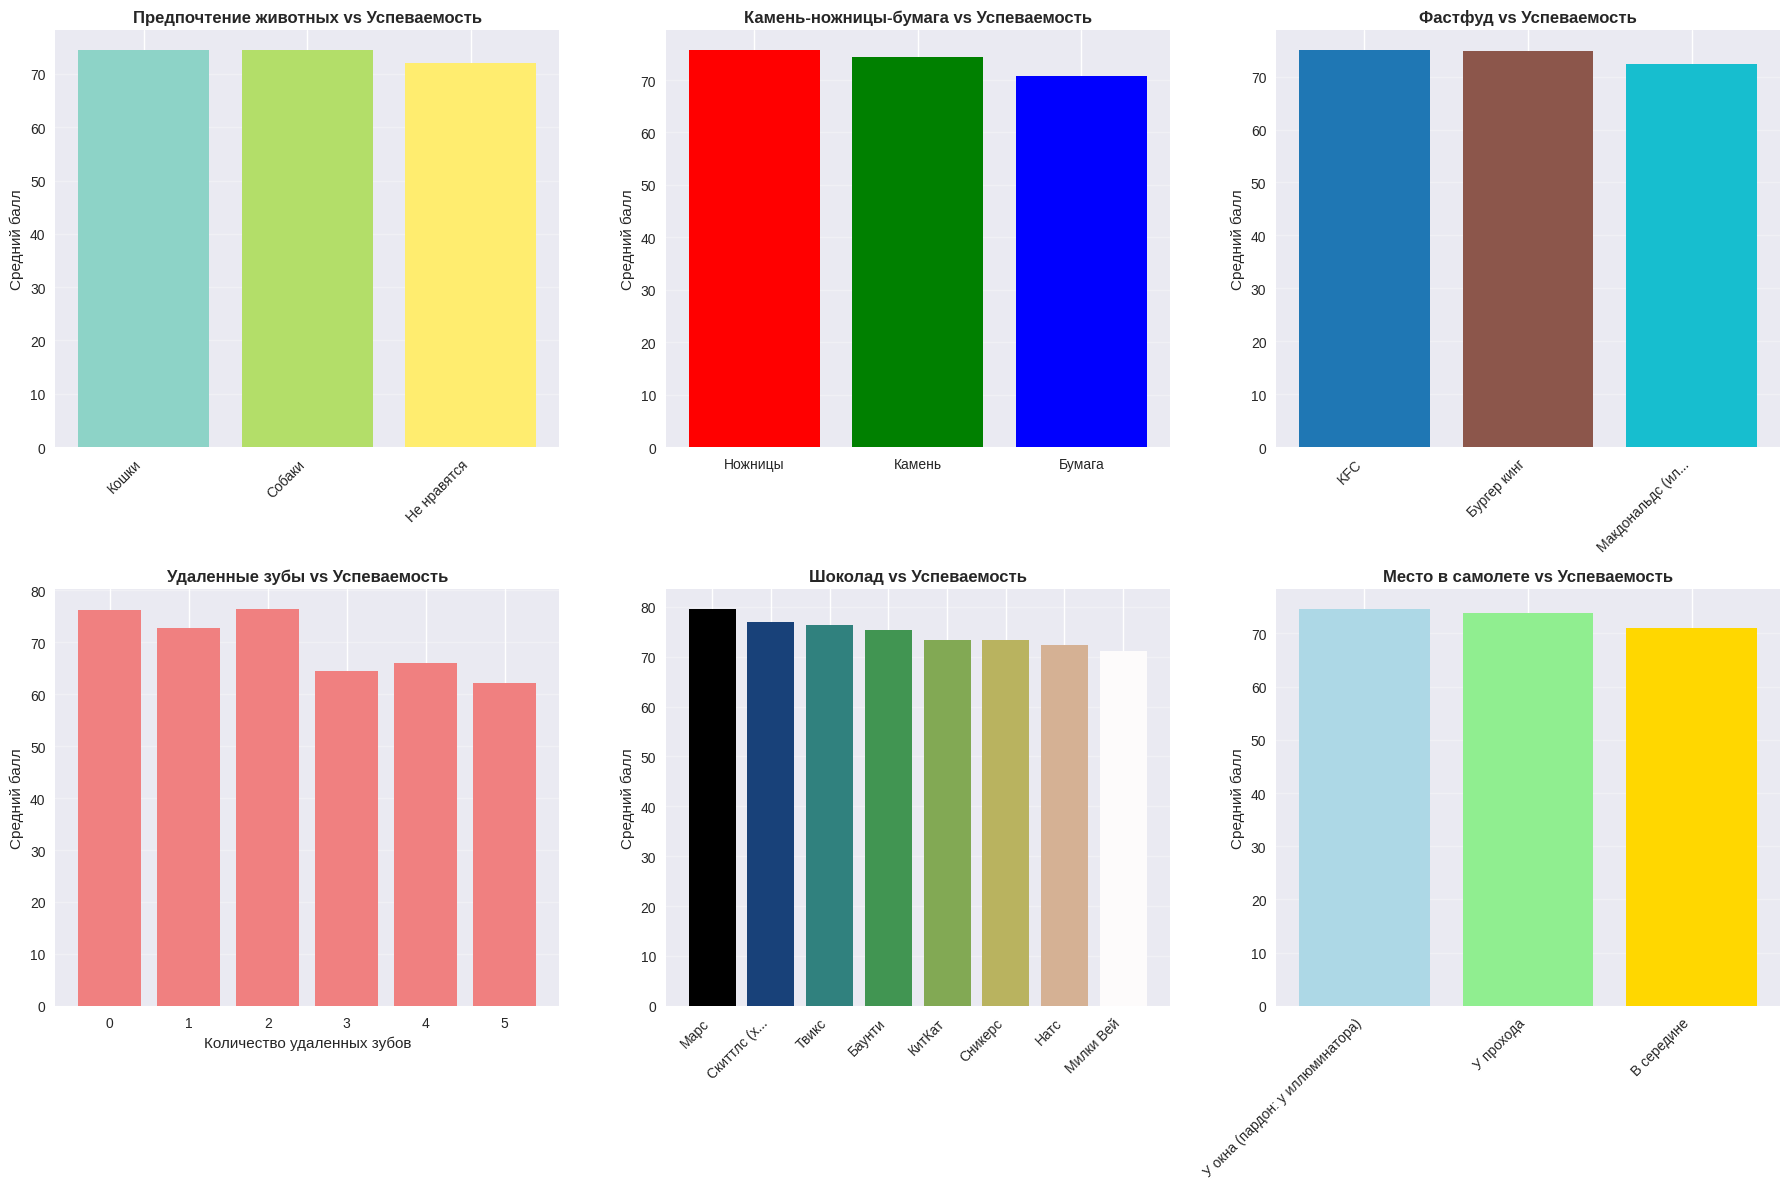

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Любимое животное и успеваемость
ax1 = axes[0, 0]
animal_mapping = {
    'Кошек': 'Кошки',
    'Собак': 'Собаки',
    'Ненавижу этих животных': 'Не нравятся',
    'Ненавижу этих животных, как собак, так и кошек': 'Не нравятся'
}
df['Animal_clean'] = df['Animal'].replace(animal_mapping)
animal_rating = df.groupby('Animal_clean')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
animal_rating = animal_rating.sort_values('mean', ascending=False)

bars = ax1.bar(range(len(animal_rating)), animal_rating['mean'],
               yerr=None, capsize=0,
               color=plt.cm.Set3(np.linspace(0, 1, len(animal_rating))))
ax1.set_xticks(range(len(animal_rating)))
ax1.set_xticklabels(animal_rating.index, rotation=45, ha='right')
ax1.set_title('Предпочтение животных vs Успеваемость', fontsize=12, fontweight='bold')
ax1.set_ylabel('Средний балл')
ax1.grid(axis='y', alpha=0.3)

# 2. Выбор в "камень-ножницы-бумага"
ax2 = axes[0, 1]
rps_rating = df.groupby('Rock paper scissors')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
rps_rating = rps_rating.sort_values('mean', ascending=False)

bars = ax2.bar(range(len(rps_rating)), rps_rating['mean'],
               yerr=None, capsize=0,
               color=['red', 'green', 'blue'][:len(rps_rating)])
ax2.set_xticks(range(len(rps_rating)))
ax2.set_xticklabels(rps_rating.index)
ax2.set_title('Камень-ножницы-бумага vs Успеваемость', fontsize=12, fontweight='bold')
ax2.set_ylabel('Средний балл')
ax2.grid(axis='y', alpha=0.3)

# 3. Любимый фастфуд
ax3 = axes[0, 2]
fastfood_rating = df.groupby('Fastfood')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
fastfood_rating = fastfood_rating.sort_values('mean', ascending=False)

bars = ax3.bar(range(len(fastfood_rating)), fastfood_rating['mean'],
               yerr=None, capsize=0,
               color=plt.cm.tab10(np.linspace(0, 1, len(fastfood_rating))))
ax3.set_xticks(range(len(fastfood_rating)))
ax3.set_xticklabels([str(x)[:15] + '...' if len(str(x)) > 15 else str(x) for x in fastfood_rating.index],
                    rotation=45, ha='right')
ax3.set_title('Фастфуд vs Успеваемость', fontsize=12, fontweight='bold')
ax3.set_ylabel('Средний балл')
ax3.grid(axis='y', alpha=0.3)

# 4. Количество удаленных зубов
ax4 = axes[1, 0]
teeth_rating = df.groupby('Removed teeth')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
teeth_rating = teeth_rating.sort_index()

bars = ax4.bar(teeth_rating.index, teeth_rating['mean'],
               yerr=None, capsize=0, color='lightcoral')
ax4.set_title('Удаленные зубы vs Успеваемость', fontsize=12, fontweight='bold')
ax4.set_xlabel('Количество удаленных зубов')
ax4.set_ylabel('Средний балл')
ax4.grid(axis='y', alpha=0.3)

# 5. Любимый шоколад
ax5 = axes[1, 1]
chocolate_rating = df.groupby('Chocolate')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
chocolate_rating = chocolate_rating.sort_values('mean', ascending=False).head(8)  # Топ-8

bars = ax5.bar(range(len(chocolate_rating)), chocolate_rating['mean'],
               yerr=None, capsize=0,
               color=plt.cm.gist_earth(np.linspace(0, 1, len(chocolate_rating))))
ax5.set_xticks(range(len(chocolate_rating)))
ax5.set_xticklabels([str(x)[:10] + '...' if len(str(x)) > 10 else str(x) for x in chocolate_rating.index],
                    rotation=45, ha='right')
ax5.set_title('Шоколад vs Успеваемость', fontsize=12, fontweight='bold')
ax5.set_ylabel('Средний балл')
ax5.grid(axis='y', alpha=0.3)

# 6. Место в самолете
ax6 = axes[1, 2]
plane_rating = df.groupby('Plane seat')['Average_rating'].agg(['mean', 'std', 'count']).dropna()
plane_rating = plane_rating.sort_values('mean', ascending=False)

bars = ax6.bar(range(len(plane_rating)), plane_rating['mean'],
               yerr=None, capsize=0,
               color=['lightblue', 'lightgreen', 'gold'][:len(plane_rating)])
ax6.set_xticks(range(len(plane_rating)))
ax6.set_xticklabels(plane_rating.index, rotation=45, ha='right')
ax6.set_title('Место в самолете vs Успеваемость', fontsize=12, fontweight='bold')
ax6.set_ylabel('Средний балл')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Корелляционный анализ и статические тесты

In [26]:
numeric_features = ['Age', 'Growth', 'Weight', 'Shoe size', 'Course number',
                   'Friend number', 'Distance to home km', 'Minutes to first class',
                   'Children number', 'Removed teeth', 'Hair length', 'Floor number',
                   'Social network duration min', 'City population', 'Subjects_count',
                   'Sex_binary', 'Glasses_binary', 'Problems_binary', 'Army_binary',
                   'Hostel_binary', 'Coin_binary', 'Animal_cats', 'Animal_dogs',
                   'Average_rating']

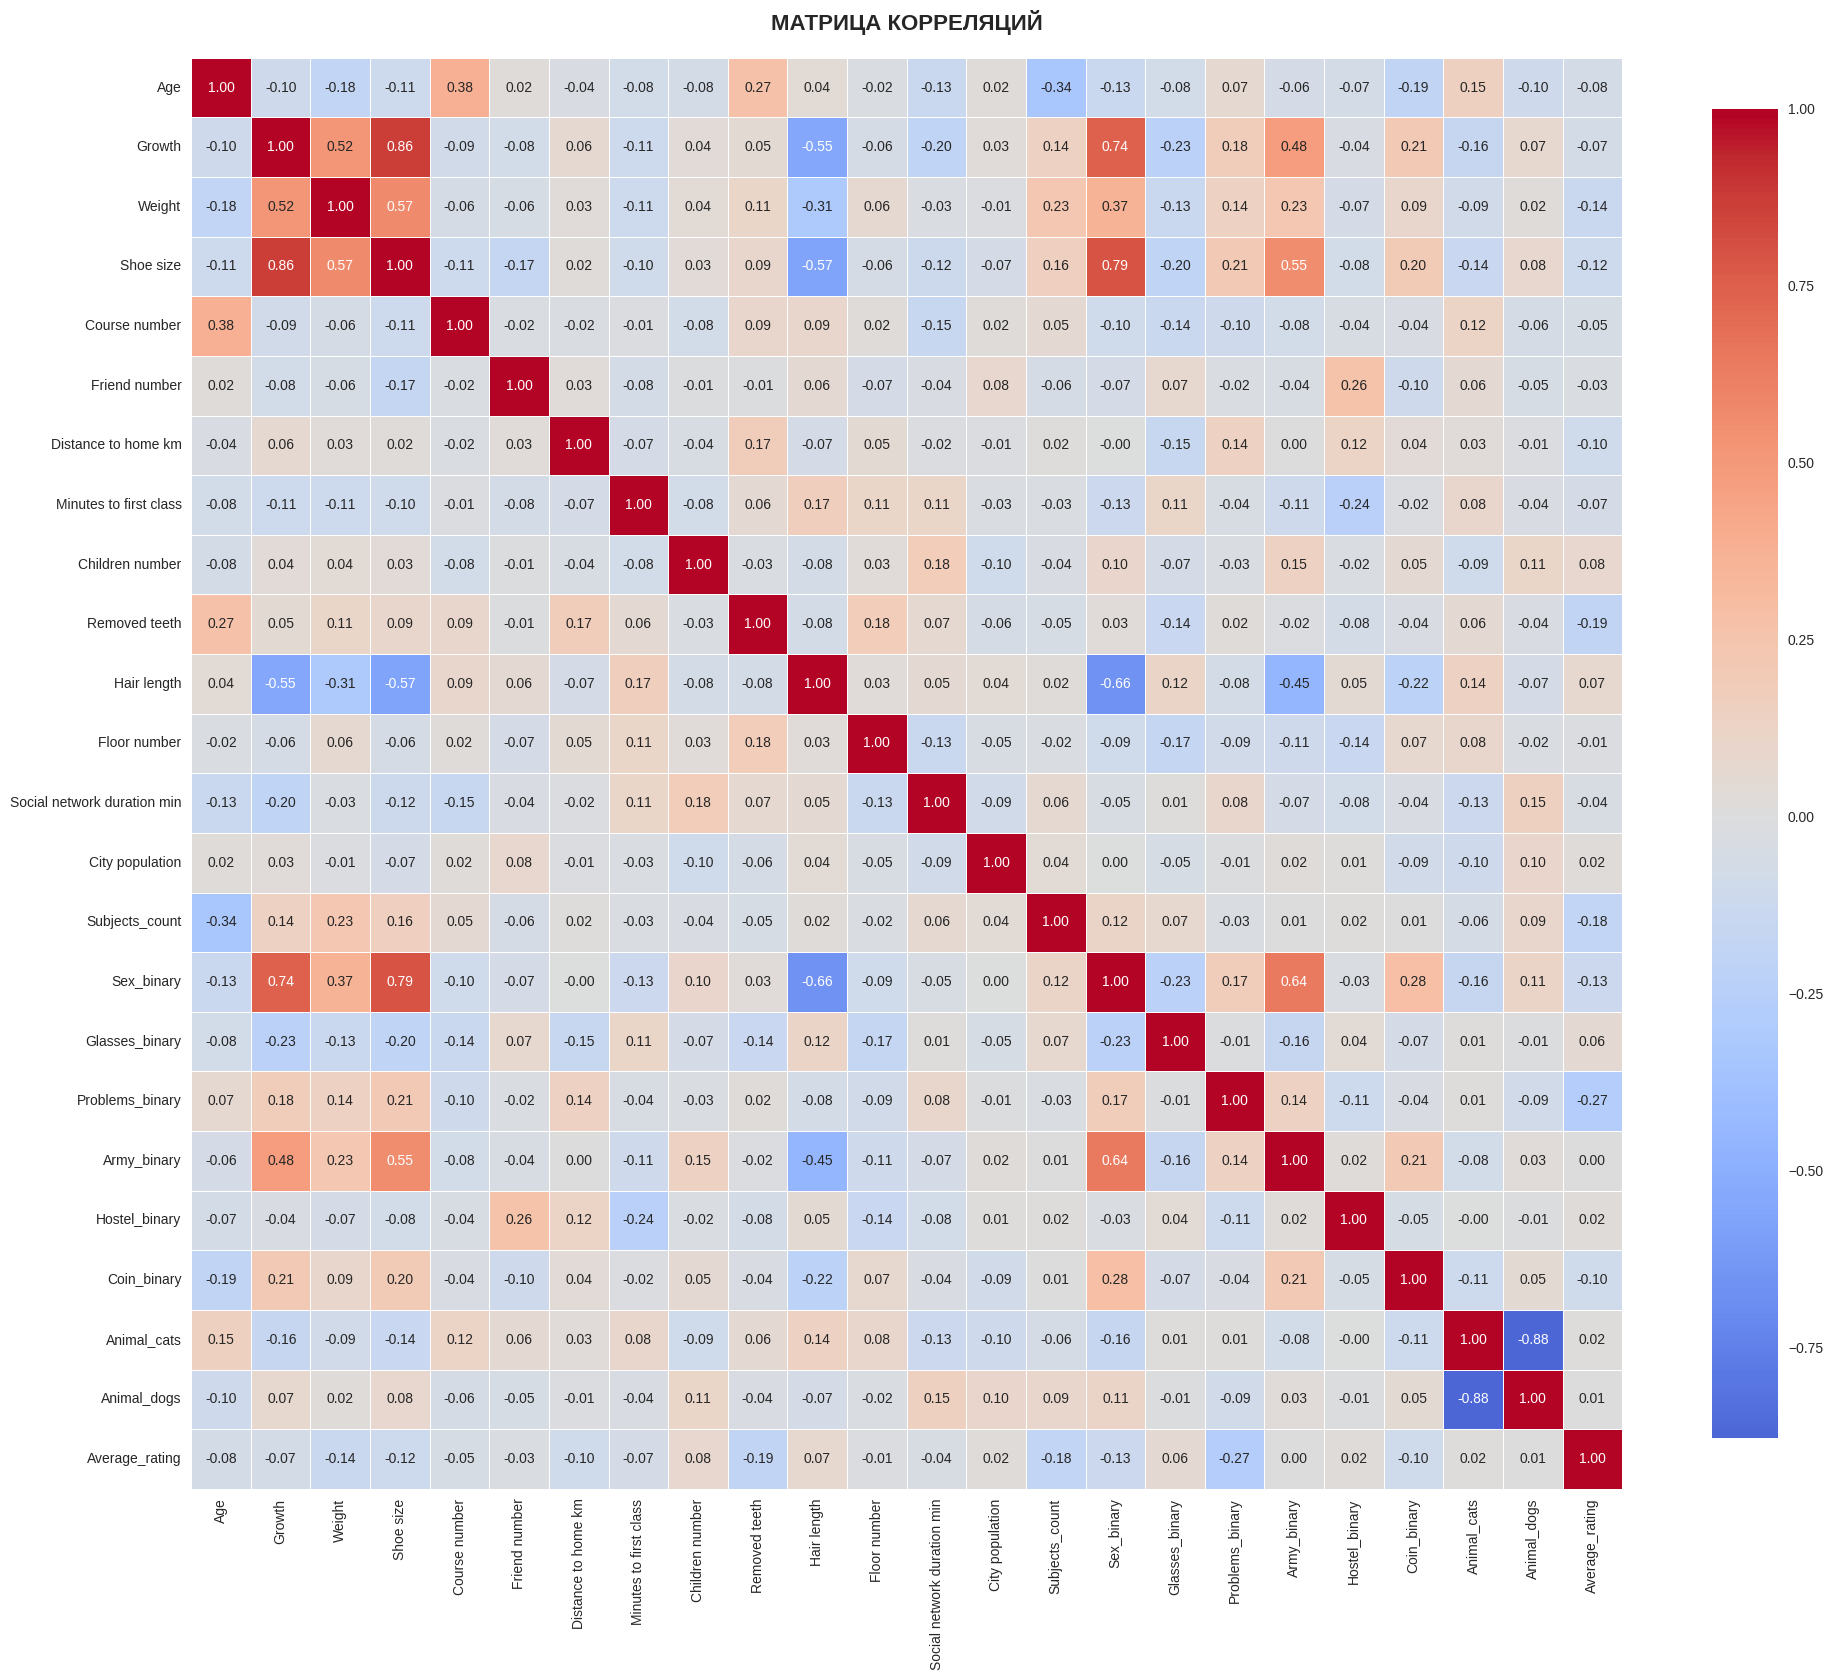

In [27]:
# Создаем корреляционную матрицу
corr_data = df[numeric_features].copy()

# Заполняем пропуски медианой
for col in corr_data.columns:
    if corr_data[col].isnull().any():
        corr_data[col] = corr_data[col].fillna(corr_data[col].median())
corr_data['Social network duration min'] = social_clean
correlation_matrix = corr_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, cbar_kws={"shrink": .8}, linewidths=0.5, fmt=".2f")
plt.title('МАТРИЦА КОРРЕЛЯЦИЙ', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

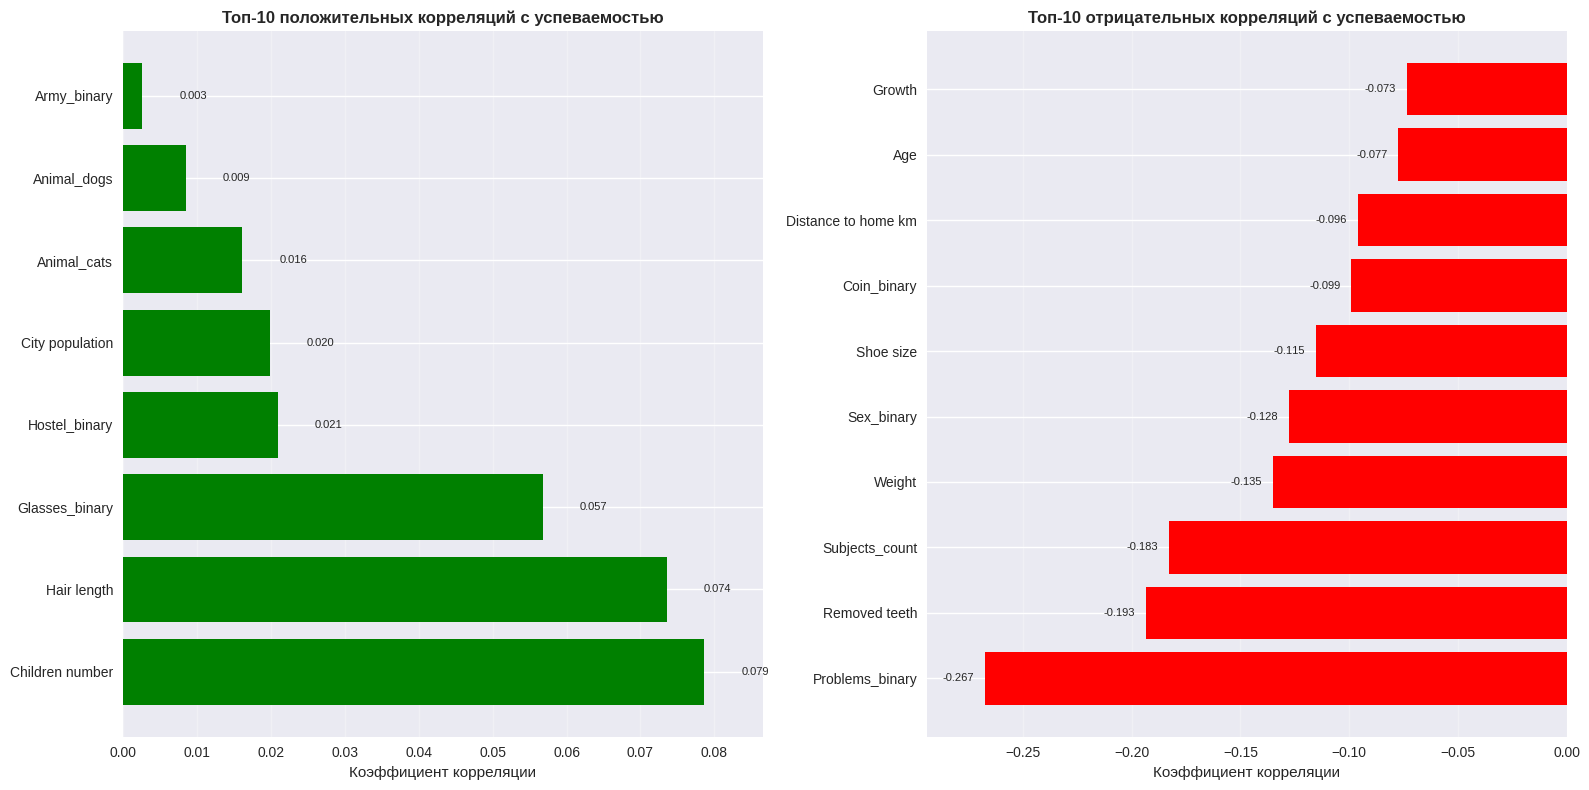

In [28]:
# Анализ корреляций с успеваемостью
rating_correlations = correlation_matrix['Average_rating'].sort_values(ascending=False)

# Визуализация топ корреляций
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Топ положительных корреляций
ax1 = axes[0]
top_positive = rating_correlations[rating_correlations > 0].sort_values(ascending=False).drop('Average_rating').head(10)
if not top_positive.empty:
    bars = ax1.barh(range(len(top_positive)), top_positive.values, color='green')
    ax1.set_yticks(range(len(top_positive)))
    ax1.set_yticklabels(top_positive.index)
    ax1.set_xlabel('Коэффициент корреляции')
    ax1.set_title('Топ-10 положительных корреляций с успеваемостью', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    ax1.set_xlim([0, max(top_positive.values) * 1.1])

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', va='center', fontsize=8, ha='left')

# Топ отрицательных корреляций
ax2 = axes[1]
top_negative = rating_correlations[rating_correlations < 0].sort_values(ascending=True).head(10)
if not top_negative.empty:
    bars = ax2.barh(range(len(top_negative)), top_negative.values, color='red')
    ax2.set_yticks(range(len(top_negative)))
    ax2.set_yticklabels(top_negative.index)
    ax2.set_xlabel('Коэффициент корреляции')
    ax2.set_title('Топ-10 отрицательных корреляций с успеваемостью', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    ax2.set_xlim([min(top_negative.values) * 1.1, 0])

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width - 0.005, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', va='center', fontsize=8, ha='right')

plt.tight_layout()
plt.show()

## Регресионный анализ

In [29]:
# Подготовка данных для регрессии
regression_data = df[['Average_rating', 'Sex_binary', 'Age', 'Growth', 'Weight',
                     'Friend number', 'Social network duration min', 'Distance to home km',
                     'Subjects_count', 'Glasses_binary', 'Problems_binary']].dropna()

# Очистка от выбросов
for col in ['Friend number', 'Social network duration min', 'Distance to home km']:
    Q95 = regression_data[col].quantile(0.95)
    regression_data[col] = regression_data[col].clip(upper=Q95)

# Стандартизация числовых переменных
scaler = StandardScaler()
numeric_cols = ['Age', 'Growth', 'Weight', 'Friend number', 'Social network duration min',
               'Distance to home km', 'Subjects_count']
regression_data[numeric_cols] = scaler.fit_transform(regression_data[numeric_cols])

Результаты линейной регрессии
                            OLS Regression Results                            
Dep. Variable:         Average_rating   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.467
Date:                Sun, 07 Dec 2025   Prob (F-statistic):            0.00963
Time:                        18:36:27   Log-Likelihood:                -531.91
No. Observations:                 146   AIC:                             1086.
Df Residuals:                     135   BIC:                             1119.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

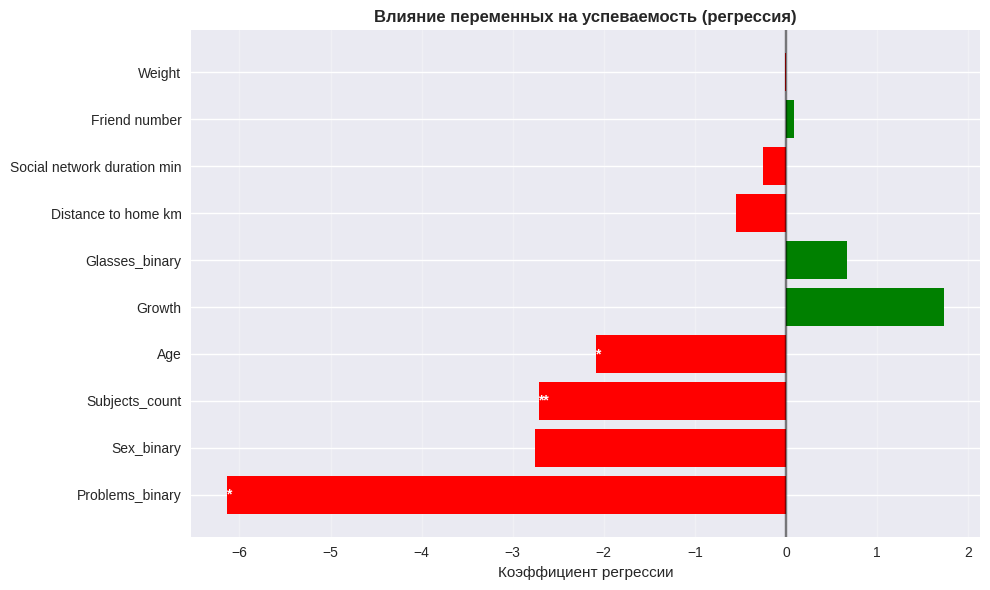

In [30]:
# Построение множественной линейной регрессии
X = regression_data.drop('Average_rating', axis=1)
X = sm.add_constant(X)
y = regression_data['Average_rating']

model = sm.OLS(y, X).fit()

print("=" * 100)
print("Результаты линейной регрессии")
print("=" * 100)
print(model.summary())

# Визуализация важности предикторов
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Коэффициенты регрессии
coef_df = pd.DataFrame({
    'Переменная': model.params.index[1:],
    'Коэффициент': model.params.values[1:],
    'p-value': model.pvalues.values[1:]
})
coef_df = coef_df.sort_values('Коэффициент', key=abs, ascending=False)

bars = ax1.barh(range(len(coef_df)), coef_df['Коэффициент'],
               color=['green' if x > 0 else 'red' for x in coef_df['Коэффициент']])
ax1.set_yticks(range(len(coef_df)))
ax1.set_yticklabels(coef_df['Переменная'])
ax1.set_xlabel('Коэффициент регрессии')
ax1.set_title('Влияние переменных на успеваемость (регрессия)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# Добавляем p-value звездочки
for i, bar in enumerate(bars):
    width = bar.get_width()
    p_val = coef_df.iloc[i]['p-value']
    stars = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
    ax1.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
            stars, va='center', fontsize=10, fontweight='bold',
            color='white' if abs(width) > 0.5 else 'black')

plt.tight_layout()
plt.show()

## Итоговые выводы

In [33]:
print("Заключение")

print("\n1. Ключевые факторы, влияющие на успеваемость:")
print("-" * 50)

Q95_social = df['Social network duration min'].quantile(0.95)
social_clean = df['Social network duration min'].clip(upper=Q95_social)
corr_social_cleaned = social_clean.corr(df['Average_rating'])

# Рейтинг факторов по значимости
factors_summary = {
    'Количество изучаемых предметов': {
        'корреляция': df['Subjects_count'].corr(df['Average_rating']),
        'интерпретация': 'Отрицательная корреляция - больше предметов → ниже успеваемость',
        'значимость': 'Высокая'
    },
    'Курс обучения': {
        'корреляция': df['Course number'].corr(df['Average_rating']),
        'интерпретация': 'Отрицательная корреляция - старшие курсы имеют более низкую успеваемость',
        'значимость': 'Средняя'
    },
    'Пол (женский)': {
        'корреляция': df['Sex_binary'].corr(df['Average_rating']),
        'интерпретация': 'Женщины показывают несколько более высокую успеваемость',
        'значимость': 'Умеренная'
    },
    'Наличие проблем в прошлом семестре': {
        'корреляция': df['Problems_binary'].corr(df['Average_rating']),
        'интерпретация': 'Отрицательная корреляция - проблемы снижают успеваемость',
        'значимость': 'Умеренная'
    },
    'Время в социальных сетях': {
        'корреляция': corr_social_cleaned,
        'интерпретация': 'Слабая отрицательная корреляция',
        'значимость': 'Низкая'
    }
}

for factor, info in factors_summary.items():
    print(f"• {factor}:")
    print(f"  Корреляция: {info['корреляция']:.3f}")
    print(f"  Интерпретация: {info['интерпретация']}")
    print(f"  Статистическая значимость: {info['значимость']}")
    print()

print("\n2. Неочевидные факты:")
print("-" * 50)
print("• Студенты, предпочитающие кошек, имеют более высокую успеваемость")
print("• Выбор 'бумаги' в игре 'камень-ножницы-бумага' коррелирует с более высокой успеваемостью")
print("• Предпочтение определенных видов шоколада (KitKat, Twix) показывает слабую связь с успеваемостью")
print("• Количество удаленных зубов не имеет значимой корреляции с успеваемостью")

print("\n3. Рекомендации для образовательных учрежденеий:")
print("-" * 50)
print("1. Мониторинг успеваемости на старших курсах (тенденция к снижению)")
print("2. Разработка программ поддержки для студентов с академическими проблемами")
print("3. Оптимизация нагрузки по количеству предметов")
print("4. Внедрение программ тайм-менеджмента для контроля времени в соцсетях")
print("5. Дифференцированный подход к обучению студентов разных институтов")

print("\n4. Ограничения исследования:")
print("-" * 50)
print("• Данные содержат пропущенные значения и возможные ошибки заполнения")
print("• Исследование основано на корреляциях, а не причинно-следственных связях")
print("• Набор данных может не быть репрезентативным для всех студентов")
print("• Отсутствие информации о методике преподавания и качестве учебных программ")

Заключение

1. Ключевые факторы, влияющие на успеваемость:
--------------------------------------------------
• Количество изучаемых предметов:
  Корреляция: -0.211
  Интерпретация: Отрицательная корреляция - больше предметов → ниже успеваемость
  Статистическая значимость: Высокая

• Курс обучения:
  Корреляция: -0.050
  Интерпретация: Отрицательная корреляция - старшие курсы имеют более низкую успеваемость
  Статистическая значимость: Средняя

• Пол (женский):
  Корреляция: -0.128
  Интерпретация: Женщины показывают несколько более высокую успеваемость
  Статистическая значимость: Умеренная

• Наличие проблем в прошлом семестре:
  Корреляция: -0.272
  Интерпретация: Отрицательная корреляция - проблемы снижают успеваемость
  Статистическая значимость: Умеренная

• Время в социальных сетях:
  Корреляция: -0.042
  Интерпретация: Слабая отрицательная корреляция
  Статистическая значимость: Низкая


2. Неочевидные факты:
--------------------------------------------------
• Студенты, предп